In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

df = pd.read_csv("Results.csv")
df

,question,answer,temperature,model,processor,output,score,acceptance_rate,tokens_per_sec
0,Who was the first President of the United States?,George Washington,0.8,speculative,greedy,The first President of the United States was ...,0.536563,0.509804,2.63
1,Who was the first President of the United States?,George Washington,0.8,ngram,greedy,The first President of the United States was ...,0.536563,1.000000,4.21
2,Who was the first President of the United States?,George Washington,0.8,autoregressive,greedy,The first President of the United States was ...,0.536563,NaN,6.20
3,What is 15 percent of 200?,30,0.8,speculative,greedy,"To find 15 percent of 200, you can multiply 2...",0.257718,0.377049,4.37
4,What is 15 percent of 200?,30,0.8,ngram,greedy,"To find 15 percent of 200, you can multiply 2...",0.168513,0.500000,9.74
...,...,...,...,...,...,...,...,...,...
355,What does CSS stand for?,Cascading Style Sheets,0.8,ngram,TopKwNoise,CSS stands for Cascading Style Sheets. It is ...,0.333341,0.000000,6.38
356,What does CSS stand for?,Cascading Style Sheets,0.8,autoregressive,TopKwNoise,CSS stands for Cascading Style Sheets. It is ...,0.352244,NaN,7.00
357,Which country is known for the Eiffel Tower?,France,0.8,speculative,TopKwNoise,"The Eiffel Tower is located in Paris, France....",0.364550,0.338462,4.28
358,Which country is known for the Eiffel Tower?,France,0.8,ngram,TopKwNoise,"The Eiffel Tower is located in Paris, France....",0.391242,0.625000,7.85


In [4]:

# prepare summary tables
# 1. Average metrics by processor
processor_summary = df.groupby("processor").agg({
    "score": "mean",
    "tokens_per_sec": "mean",
    "acceptance_rate": "mean"
}).reset_index()

processor_summary

,processor,score,tokens_per_sec,acceptance_rate
0,TopKwNoise,0.445733,6.255000,0.371298
1,greedy,0.442745,6.258556,0.400863
2,multinomial,0.443208,6.167222,0.351686
3,topk,0.433513,6.275333,0.354950


In [5]:

# 2. Average metrics by model
model_summary = df.groupby("model").agg({
    "score": "mean",
    "tokens_per_sec": "mean",
    "acceptance_rate": "mean"
}).reset_index()
model_summary

,model,score,tokens_per_sec,acceptance_rate
0,autoregressive,0.442959,6.556667,NaN
1,ngram,0.439691,7.072917,0.288144
2,speculative,0.441249,5.087500,0.451254


In [6]:

# 3. Combined processor + model summary
combo_summary = df.groupby(["model", "processor"]).agg({
    "score": "mean",
    "tokens_per_sec": "mean",
    "acceptance_rate": "mean"
}).reset_index()


combo_summary

,model,processor,score,tokens_per_sec,acceptance_rate
0,autoregressive,TopKwNoise,0.447095,6.587333,NaN
1,autoregressive,greedy,0.440363,6.493333,NaN
2,autoregressive,multinomial,0.444362,6.483667,NaN
3,autoregressive,topk,0.440017,6.662333,NaN
4,ngram,TopKwNoise,0.443810,7.099000,0.302586
5,ngram,greedy,0.440320,6.978333,0.287731
6,ngram,multinomial,0.445100,7.035667,0.276147
7,ngram,topk,0.429536,7.178667,0.286111
8,speculative,TopKwNoise,0.446294,5.078667,0.440009
9,speculative,greedy,0.447552,5.304000,0.513995


C:\Users\negin\AppData\Local\Temp\ipykernel_53812\1064535982.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=processor_summary, x="score", y="processor", palette="viridis")


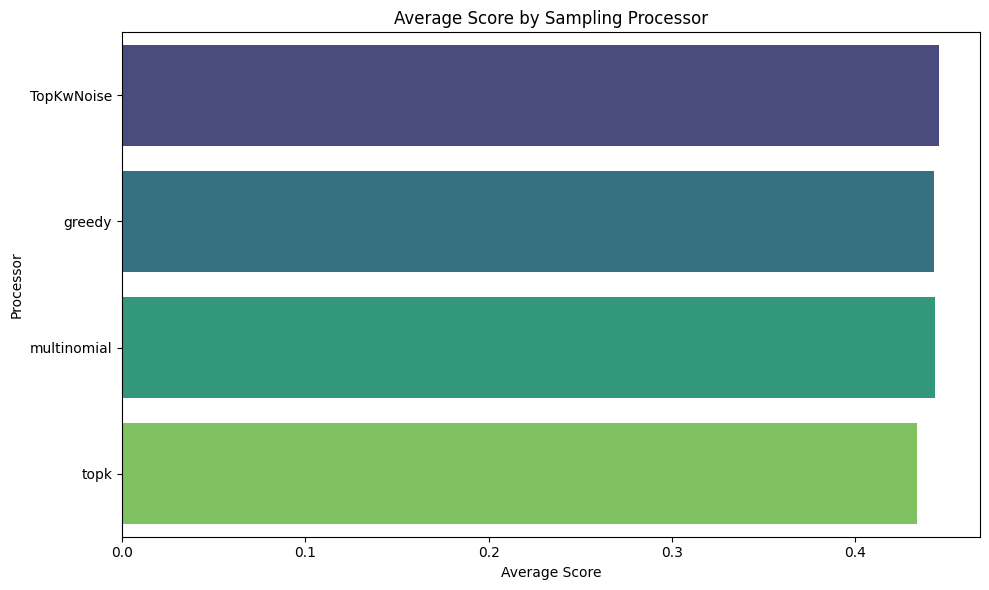

In [7]:

# Plot 1: Score by processor
plt.figure(figsize=(10, 6))
sns.barplot(data=processor_summary, x="score", y="processor", palette="viridis")
plt.title("Average Score by Sampling Processor")
plt.xlabel("Average Score")
plt.ylabel("Processor")
plt.tight_layout()
plt.show()


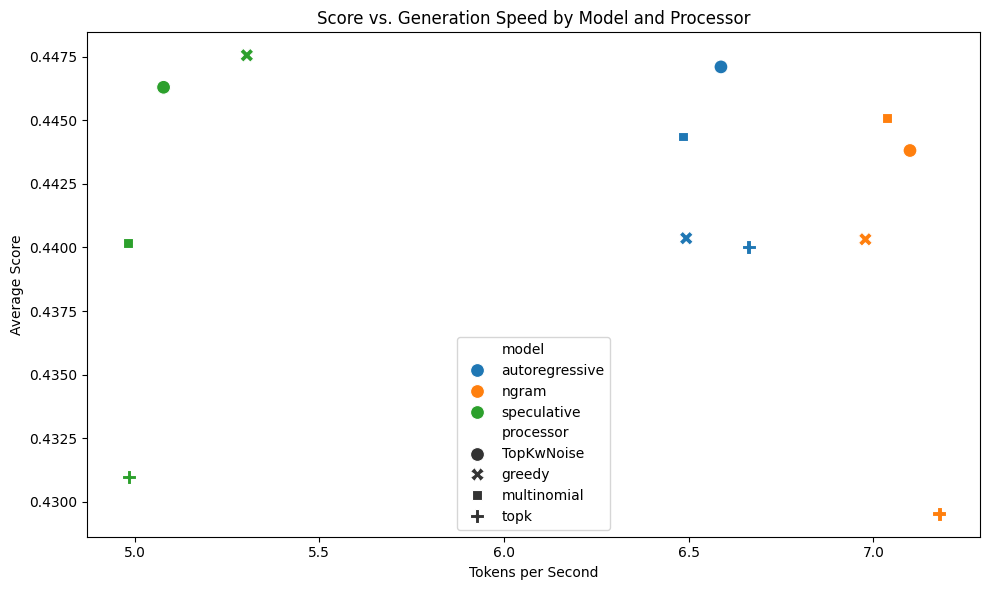

In [8]:

# Plot 2: Score vs Speed (tokens/sec) scatter by model
plt.figure(figsize=(10, 6))
sns.scatterplot(data=combo_summary, x="tokens_per_sec", y="score", hue="model", style="processor", s=100)
plt.title("Score vs. Generation Speed by Model and Processor")
plt.xlabel("Tokens per Second")
plt.ylabel("Average Score")
plt.tight_layout()
plt.show()


C:\Users\negin\AppData\Local\Temp\ipykernel_53812\614144538.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=spec_proc_summary, x="acceptance_rate", y="processor", palette="coolwarm")


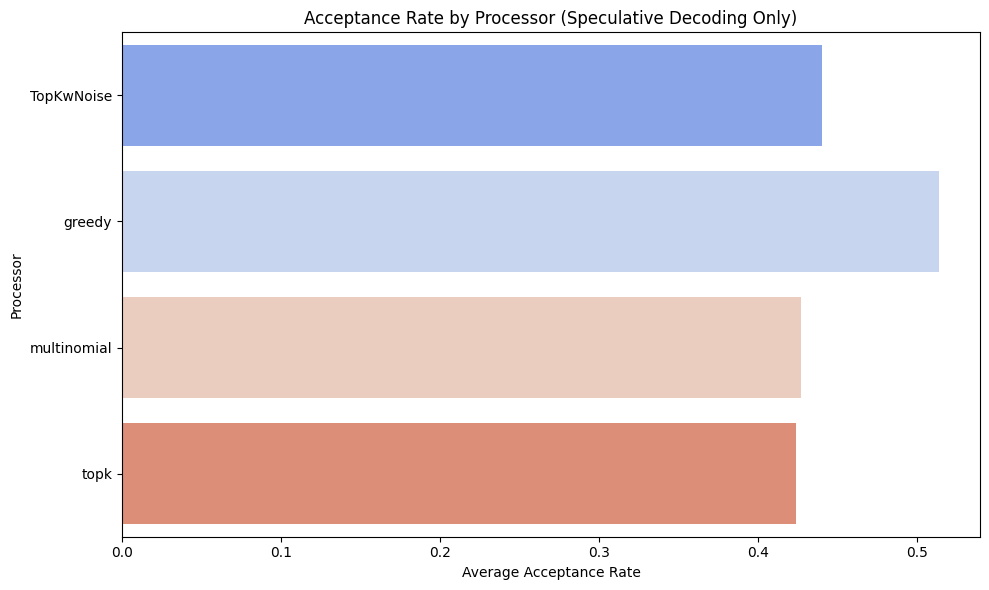

In [9]:

# Plot 3: Acceptance rate by processor (for speculative decoding only)
plt.figure(figsize=(10, 6))
speculative_only = df[df["model"] == "speculative"]
spec_proc_summary = speculative_only.groupby("processor")["acceptance_rate"].mean().reset_index()
sns.barplot(data=spec_proc_summary, x="acceptance_rate", y="processor", palette="coolwarm")
plt.title("Acceptance Rate by Processor (Speculative Decoding Only)")
plt.xlabel("Average Acceptance Rate")
plt.ylabel("Processor")
plt.tight_layout()
plt.show()


C:\Users\negin\AppData\Local\Temp\ipykernel_53812\1064535982.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=processor_summary, x="score", y="processor", palette="viridis")


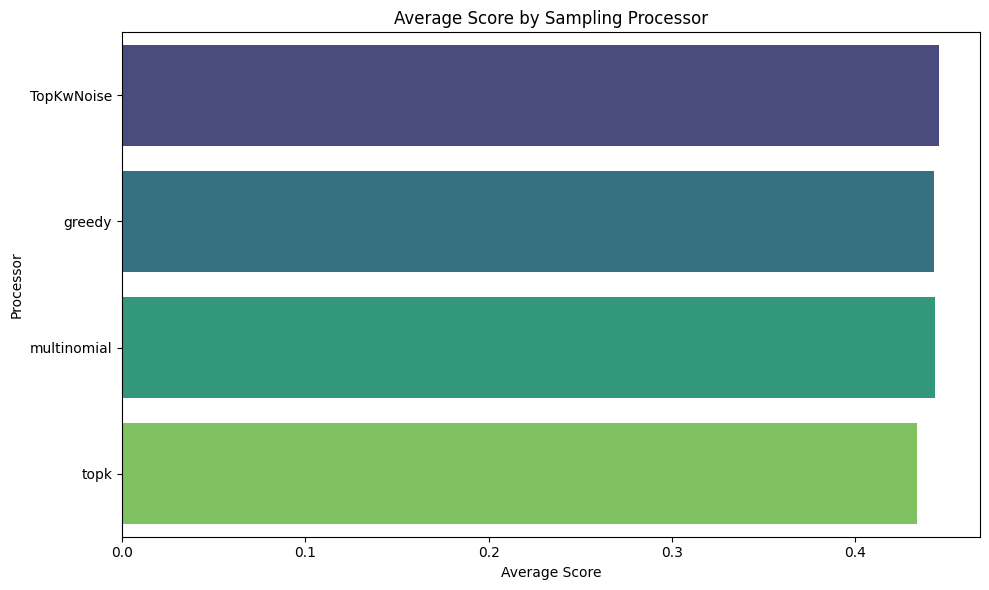

In [10]:

# Plot 1: Score by processor
plt.figure(figsize=(10, 6))
sns.barplot(data=processor_summary, x="score", y="processor", palette="viridis")
plt.title("Average Score by Sampling Processor")
plt.xlabel("Average Score")
plt.ylabel("Processor")
plt.tight_layout()
plt.show()


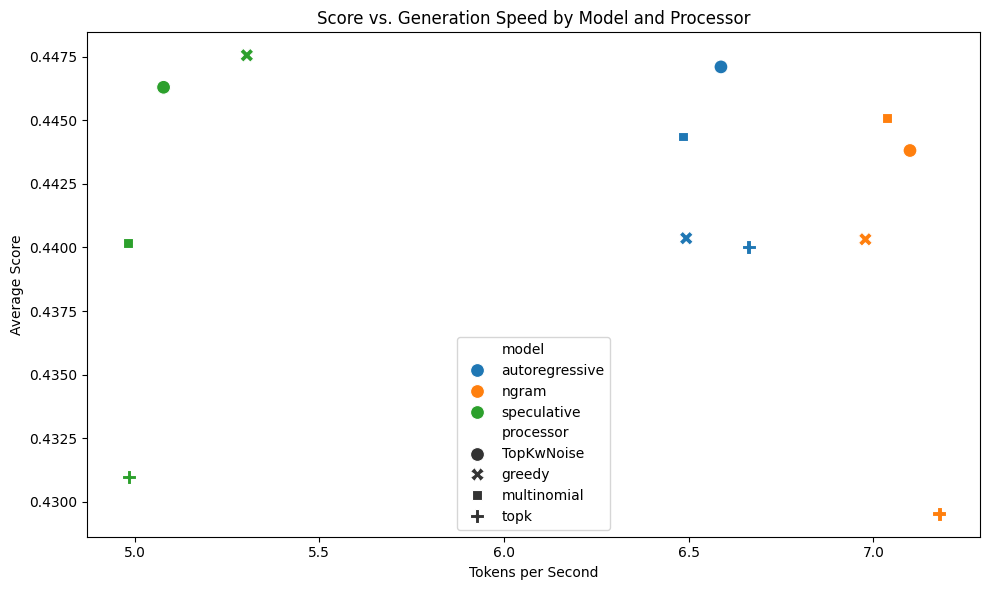

In [11]:

# Plot 2: Score vs Speed (tokens/sec) scatter by model
plt.figure(figsize=(10, 6))
sns.scatterplot(data=combo_summary, x="tokens_per_sec", y="score", hue="model", style="processor", s=100)
plt.title("Score vs. Generation Speed by Model and Processor")
plt.xlabel("Tokens per Second")
plt.ylabel("Average Score")
plt.tight_layout()
plt.show()


C:\Users\negin\AppData\Local\Temp\ipykernel_53812\614144538.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=spec_proc_summary, x="acceptance_rate", y="processor", palette="coolwarm")


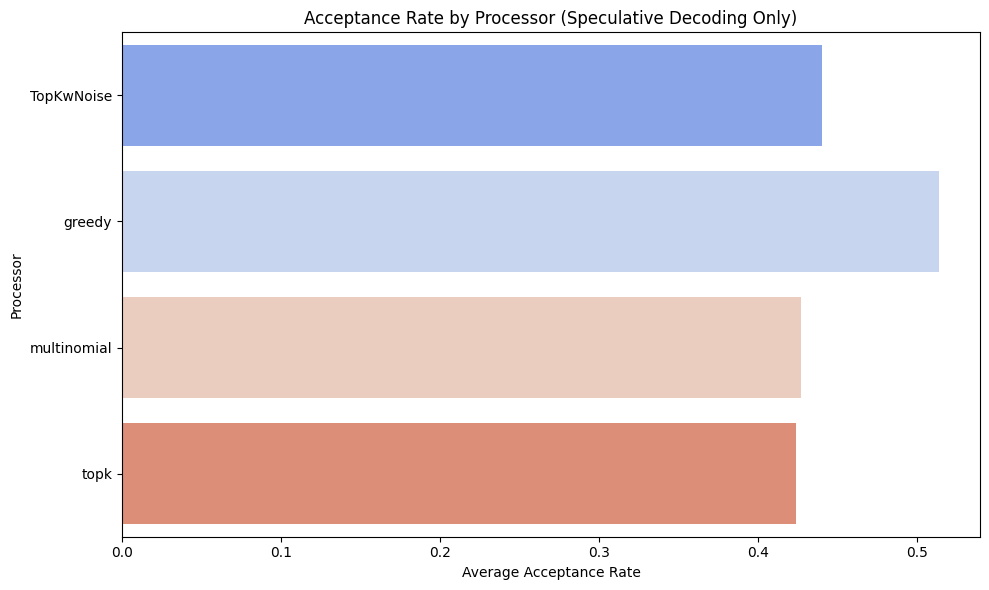

In [12]:

# Plot 3: Acceptance rate by processor (for speculative decoding only)
plt.figure(figsize=(10, 6))
speculative_only = df[df["model"] == "speculative"]
spec_proc_summary = speculative_only.groupby("processor")["acceptance_rate"].mean().reset_index()
sns.barplot(data=spec_proc_summary, x="acceptance_rate", y="processor", palette="coolwarm")
plt.title("Acceptance Rate by Processor (Speculative Decoding Only)")
plt.xlabel("Average Acceptance Rate")
plt.ylabel("Processor")
plt.tight_layout()
plt.show()


## MORE 

C:\Users\negin\AppData\Local\Temp\ipykernel_53812\2147389317.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary, x="score", y="processor", palette="magma")


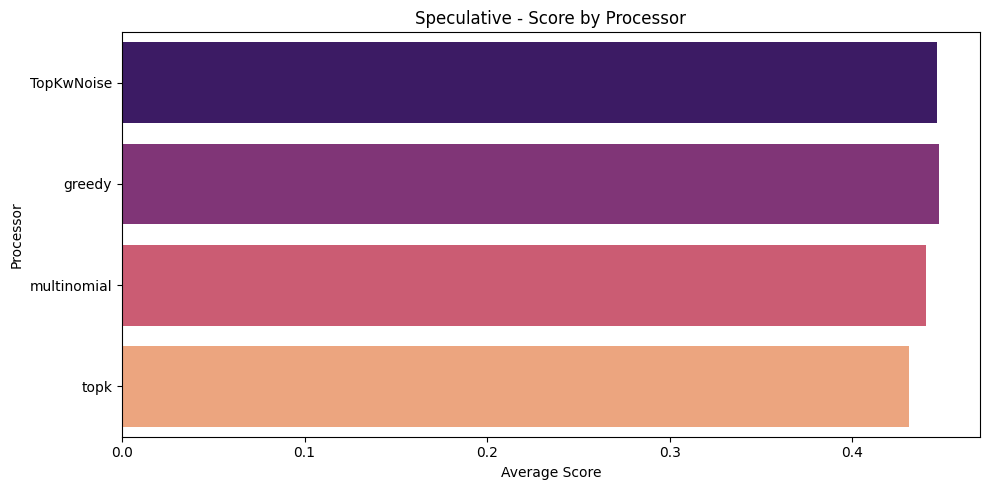

C:\Users\negin\AppData\Local\Temp\ipykernel_53812\2147389317.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary, x="tokens_per_sec", y="processor", palette="cividis")


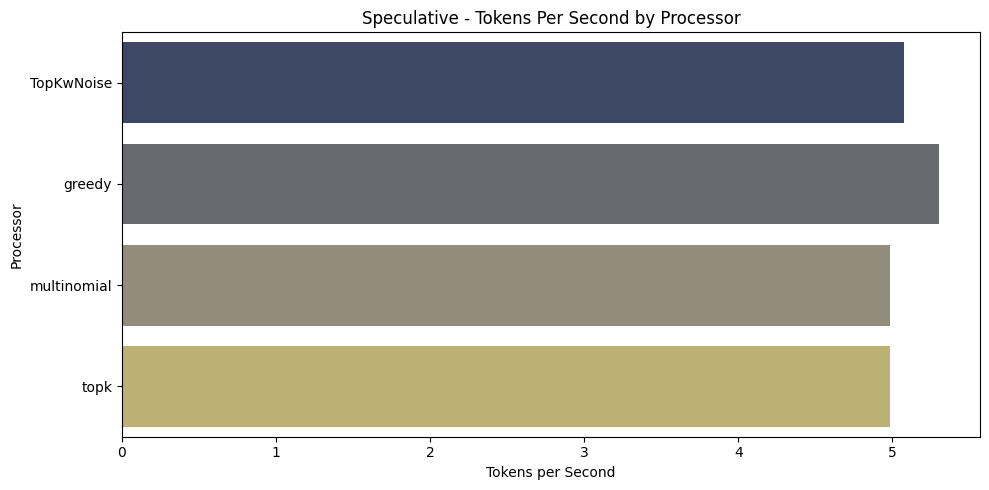

C:\Users\negin\AppData\Local\Temp\ipykernel_53812\2147389317.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary, x="acceptance_rate", y="processor", palette="coolwarm")


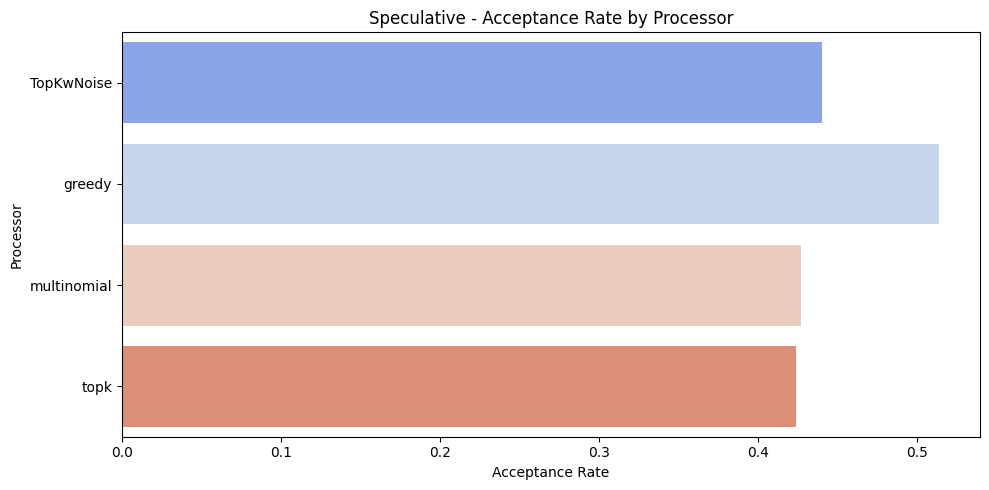

C:\Users\negin\AppData\Local\Temp\ipykernel_53812\2147389317.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary, x="score", y="processor", palette="magma")


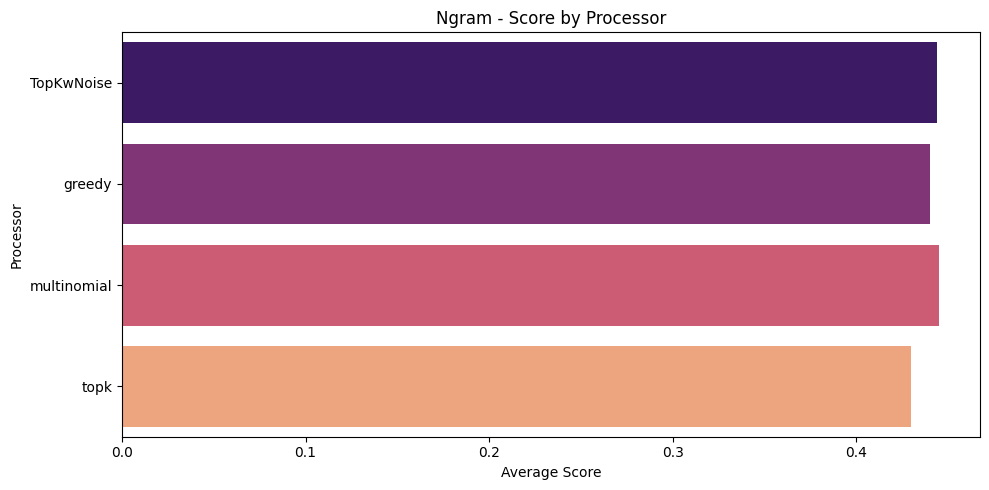

C:\Users\negin\AppData\Local\Temp\ipykernel_53812\2147389317.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary, x="tokens_per_sec", y="processor", palette="cividis")


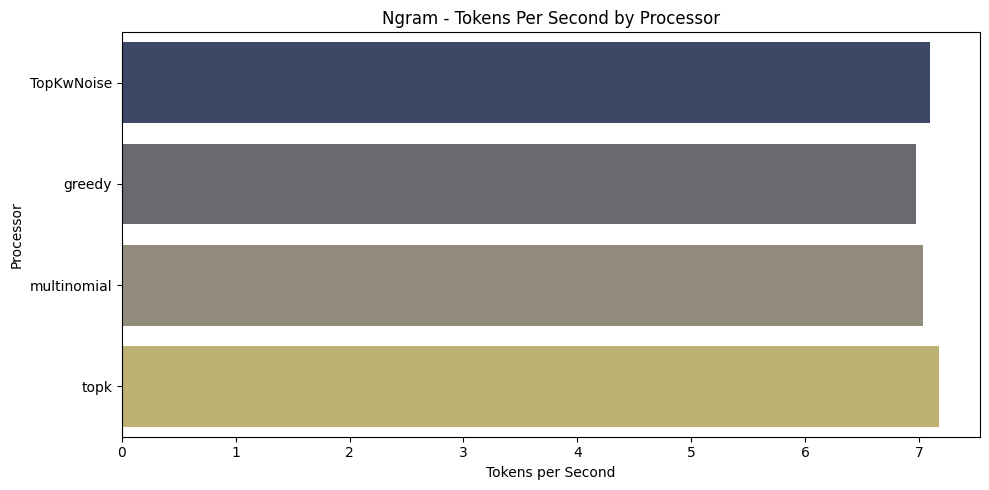

C:\Users\negin\AppData\Local\Temp\ipykernel_53812\2147389317.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary, x="score", y="processor", palette="magma")


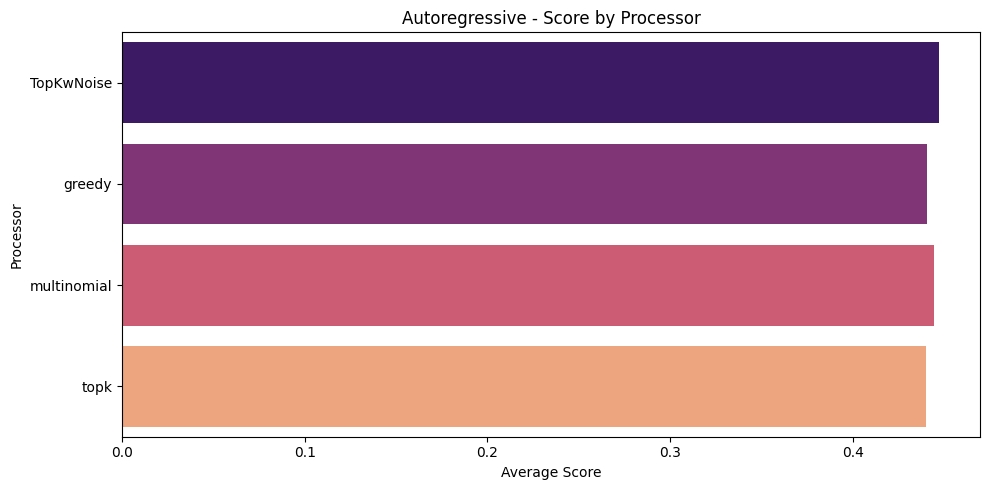

C:\Users\negin\AppData\Local\Temp\ipykernel_53812\2147389317.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary, x="tokens_per_sec", y="processor", palette="cividis")


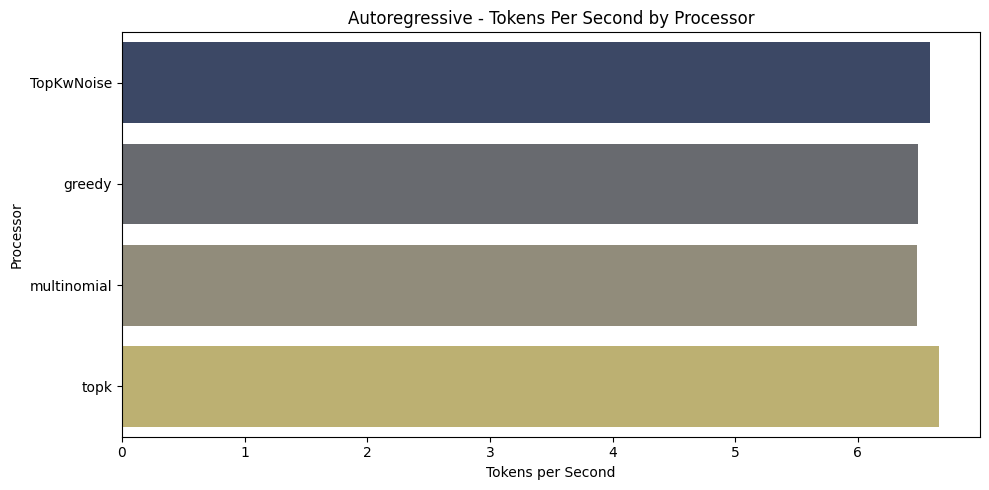

In [13]:
# Separate visual analyses per model

# Function to plot per-model breakdown
def plot_model_details(model_name):
    subset = df[df["model"] == model_name]
    summary = subset.groupby("processor").agg({
        "score": "mean",
        "tokens_per_sec": "mean",
        "acceptance_rate": "mean"
    }).reset_index()

    # Score per processor
    plt.figure(figsize=(10, 5))
    sns.barplot(data=summary, x="score", y="processor", palette="magma")
    plt.title(f"{model_name.capitalize()} - Score by Processor")
    plt.xlabel("Average Score")
    plt.ylabel("Processor")
    plt.tight_layout()
    plt.show()

    # Tokens per second
    plt.figure(figsize=(10, 5))
    sns.barplot(data=summary, x="tokens_per_sec", y="processor", palette="cividis")
    plt.title(f"{model_name.capitalize()} - Tokens Per Second by Processor")
    plt.xlabel("Tokens per Second")
    plt.ylabel("Processor")
    plt.tight_layout()
    plt.show()

    # Acceptance Rate (only for speculative)
    if model_name == "speculative":
        plt.figure(figsize=(10, 5))
        sns.barplot(data=summary, x="acceptance_rate", y="processor", palette="coolwarm")
        plt.title(f"{model_name.capitalize()} - Acceptance Rate by Processor")
        plt.xlabel("Acceptance Rate")
        plt.ylabel("Processor")
        plt.tight_layout()
        plt.show()

# Generate plots for all three models
for model in ["speculative", "ngram", "autoregressive"]:
    plot_model_details(model)


In [15]:
# is the answer within output flag
df["is_answer_in_output"] = df.apply(lambda row: row["answer"] in row["output"], axis=1)

# Print the updated DataFrame
df


,question,answer,temperature,model,processor,output,score,acceptance_rate,tokens_per_sec,is_answer_in_output
0,Who was the first President of the United States?,George Washington,0.8,speculative,greedy,The first President of the United States was ...,0.536563,0.509804,2.63,True
1,Who was the first President of the United States?,George Washington,0.8,ngram,greedy,The first President of the United States was ...,0.536563,1.000000,4.21,True
2,Who was the first President of the United States?,George Washington,0.8,autoregressive,greedy,The first President of the United States was ...,0.536563,NaN,6.20,True
3,What is 15 percent of 200?,30,0.8,speculative,greedy,"To find 15 percent of 200, you can multiply 2...",0.257718,0.377049,4.37,True
4,What is 15 percent of 200?,30,0.8,ngram,greedy,"To find 15 percent of 200, you can multiply 2...",0.168513,0.500000,9.74,False
...,...,...,...,...,...,...,...,...,...,...
355,What does CSS stand for?,Cascading Style Sheets,0.8,ngram,TopKwNoise,CSS stands for Cascading Style Sheets. It is ...,0.333341,0.000000,6.38,True
356,What does CSS stand for?,Cascading Style Sheets,0.8,autoregressive,TopKwNoise,CSS stands for Cascading Style Sheets. It is ...,0.352244,NaN,7.00,True
357,Which country is known for the Eiffel Tower?,France,0.8,speculative,TopKwNoise,"The Eiffel Tower is located in Paris, France....",0.364550,0.338462,4.28,True
358,Which country is known for the Eiffel Tower?,France,0.8,ngram,TopKwNoise,"The Eiffel Tower is located in Paris, France....",0.391242,0.625000,7.85,True


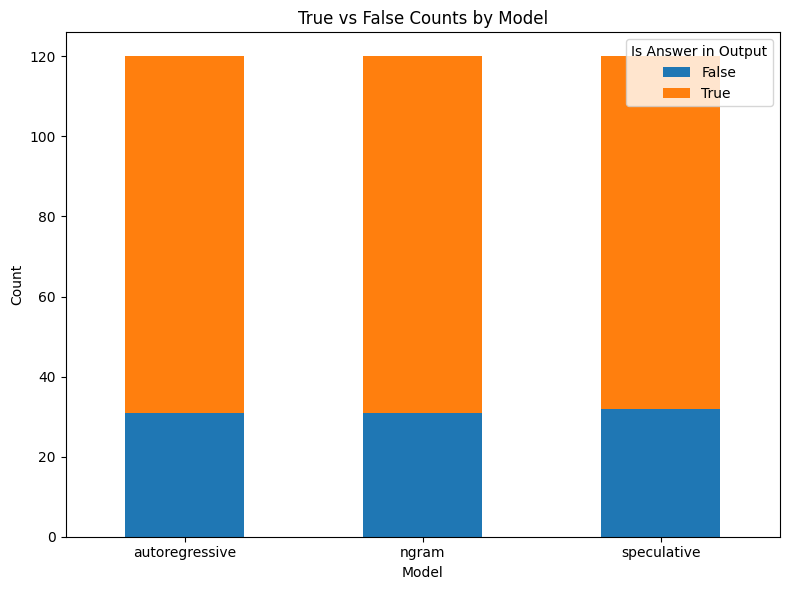

In [16]:
# Group by 'model' and count True and False values
grouped_counts = df.groupby(["model", "is_answer_in_output"]).size().reset_index(name="count")

# Pivot to prepare data for plotting
pivoted_counts = grouped_counts.pivot(index="model", columns="is_answer_in_output", values="count").fillna(0)

# Plot the data
pivoted_counts.plot(kind="bar", stacked=True, figsize=(8, 6))
plt.title("True vs False Counts by Model")
plt.xlabel("Model")
plt.ylabel("Count")
plt.legend(title="Is Answer in Output", labels=["False", "True"])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


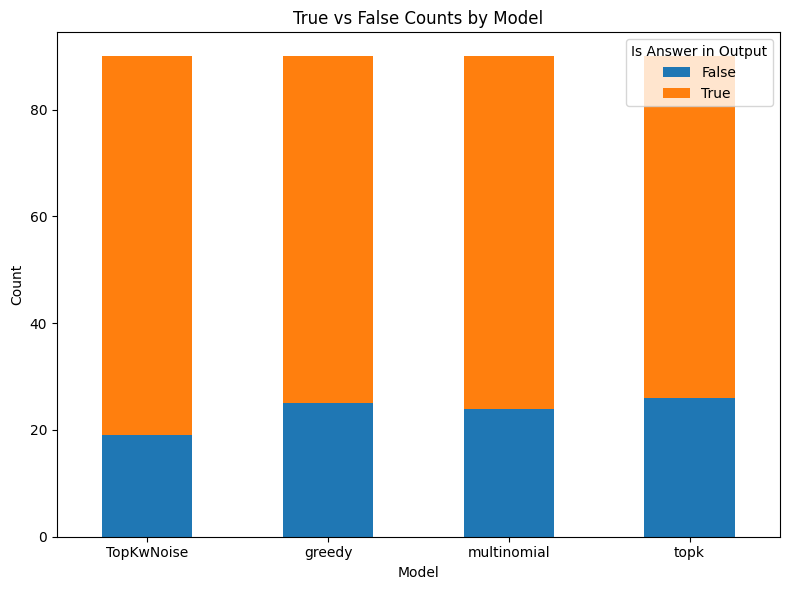

In [18]:
# Group by 'model' and count True and False values
grouped_counts = df.groupby(["processor", "is_answer_in_output"]).size().reset_index(name="count")

# Pivot to prepare data for plotting
pivoted_counts = grouped_counts.pivot(index="processor", columns="is_answer_in_output", values="count").fillna(0)

# Plot the data
pivoted_counts.plot(kind="bar", stacked=True, figsize=(8, 6))
plt.title("True vs False Counts by Model")
plt.xlabel("Model")
plt.ylabel("Count")
plt.legend(title="Is Answer in Output", labels=["False", "True"])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


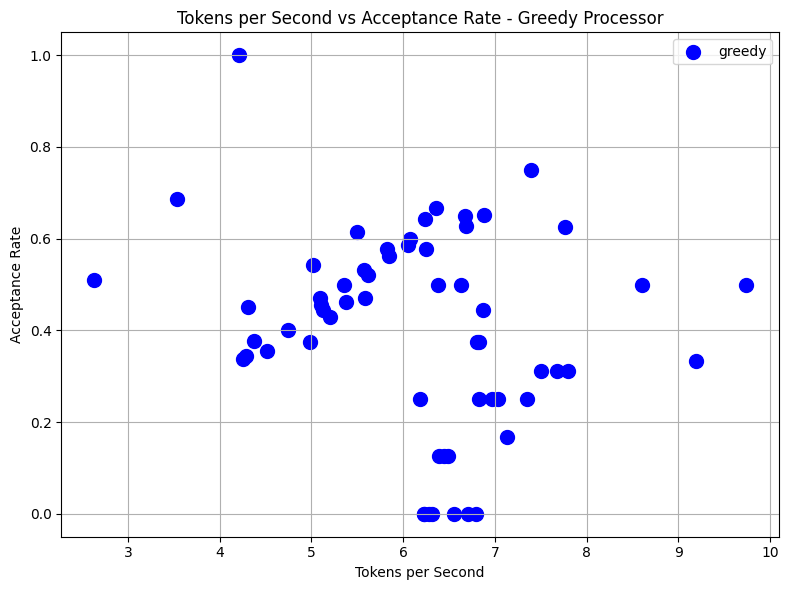

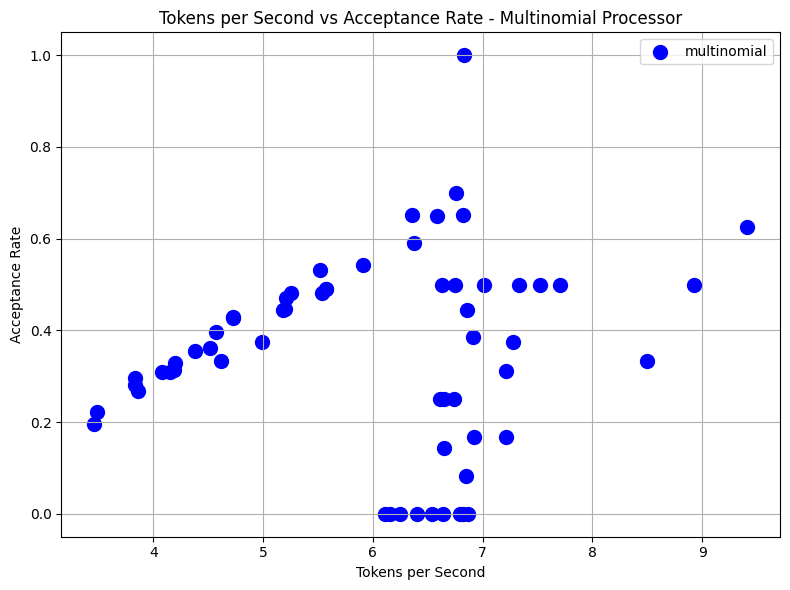

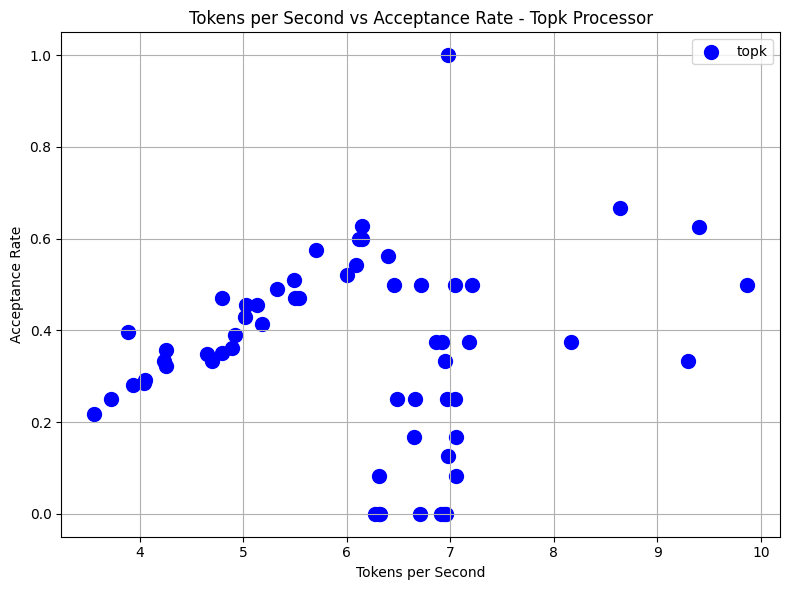

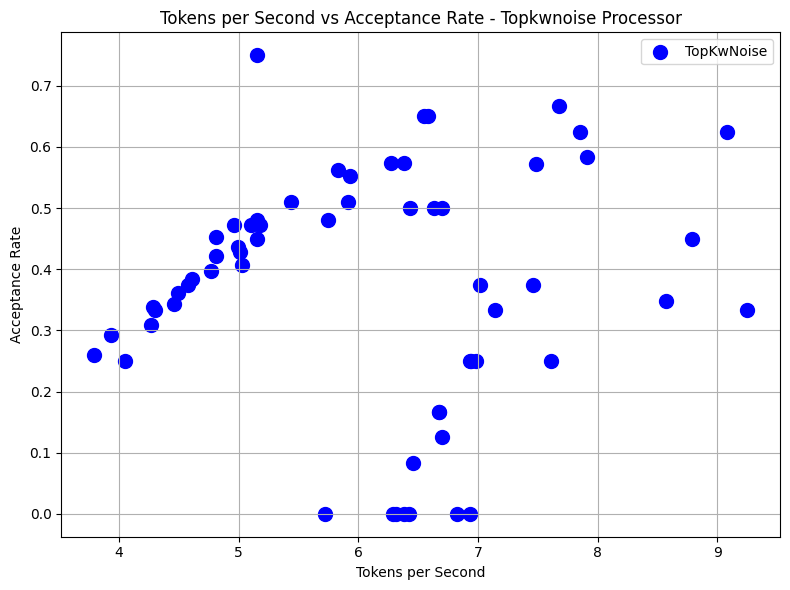

In [ ]:
# Create a scatter plot for tokens_per_sec vs acceptance_rate, grouped by processor

# Get unique processors
processors = df["processor"].unique()

# Create a separate graph for each processor
for processor in processors:
    processor_data = df[df["processor"] == processor]  # Filter data for the processor

    # Plot the data
    plt.figure(figsize=(8, 6))
    plt.scatter(processor_data["tokens_per_sec"], processor_data["acceptance_rate"], label=processor, color="blue", s=100)
    plt.title(f"Tokens per Second vs Acceptance Rate - {processor.capitalize()} Processor")
    plt.xlabel("Tokens per Second")
    plt.ylabel("Acceptance Rate")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()

    # Show each graph one by one
    plt.show()


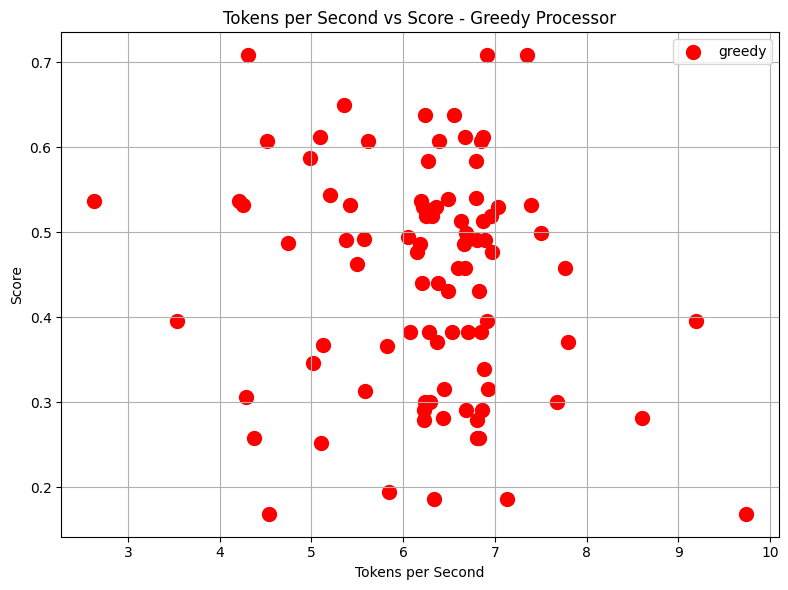

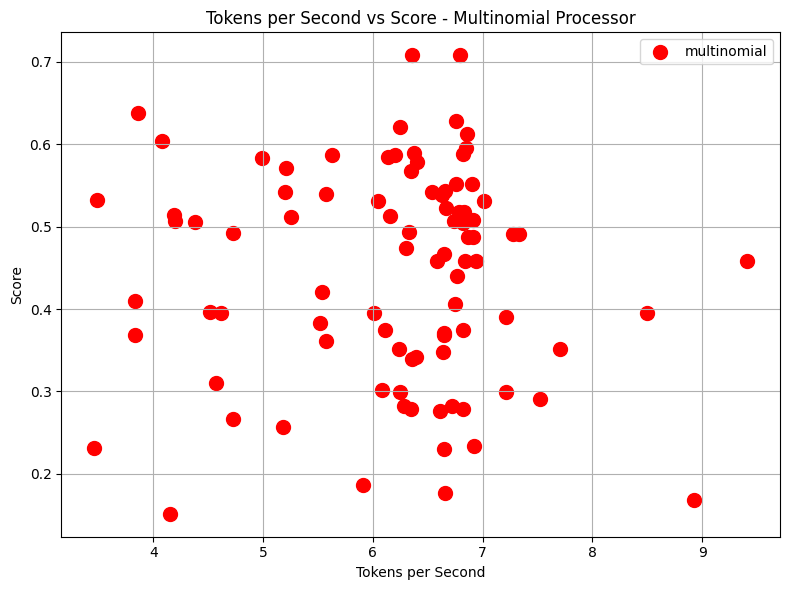

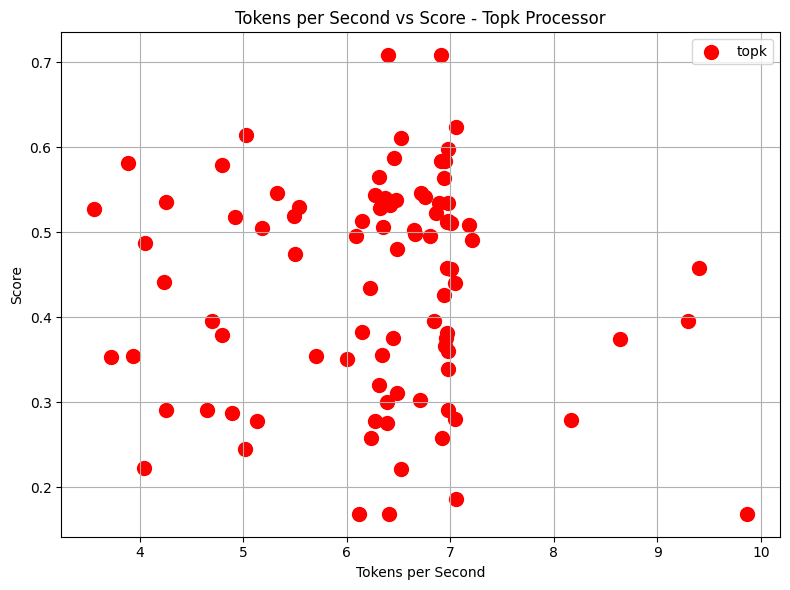

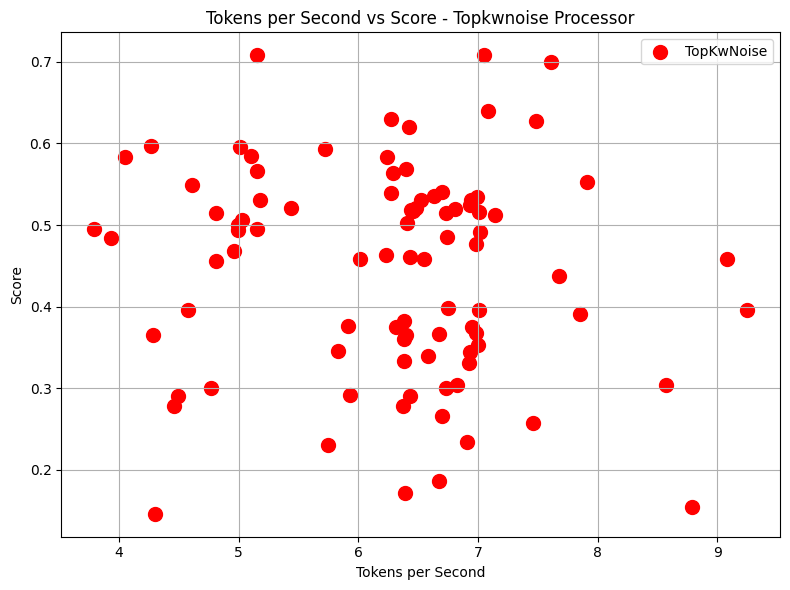

In [23]:
# Create a scatter plot for tokens_per_sec vs acceptance_rate, grouped by processor

# Get unique processors
processors = df["processor"].unique()

# Create a separate graph for each processor
for processor in processors:
    processor_data = df[df["processor"] == processor]  # Filter data for the processor

    # Plot the data
    plt.figure(figsize=(8, 6))
    plt.scatter(processor_data["tokens_per_sec"], processor_data["score"], label=processor, color="red", s=100)
    plt.title(f"Tokens per Second vs Score - {processor.capitalize()} Processor")
    plt.xlabel("Tokens per Second")
    plt.ylabel("Score")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()

    # Show each graph one by one
    plt.show()


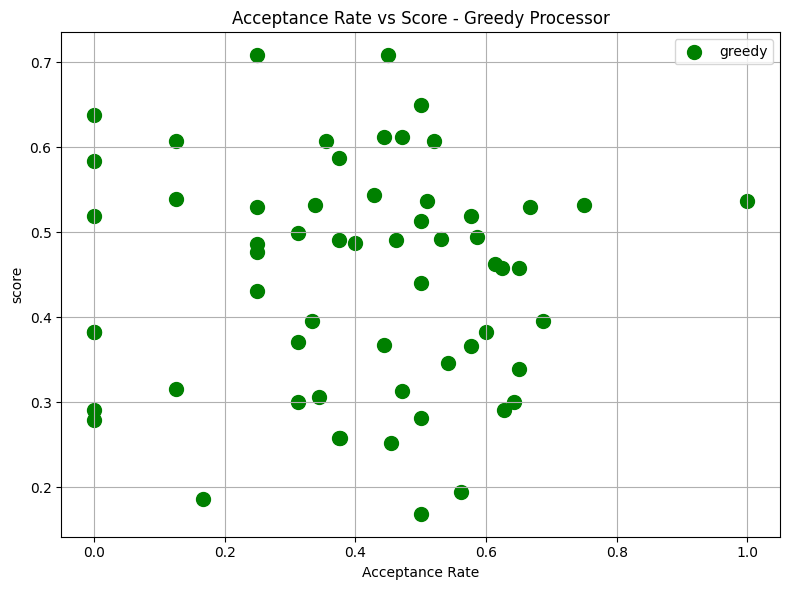

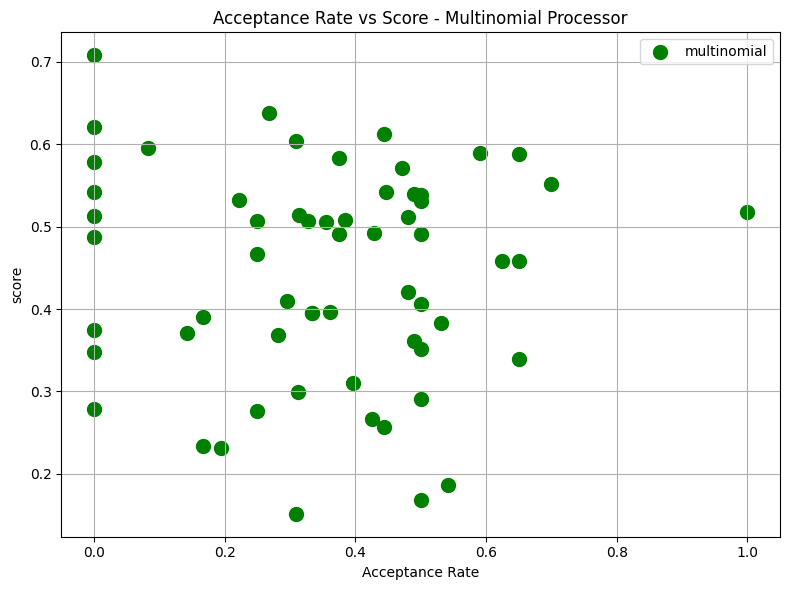

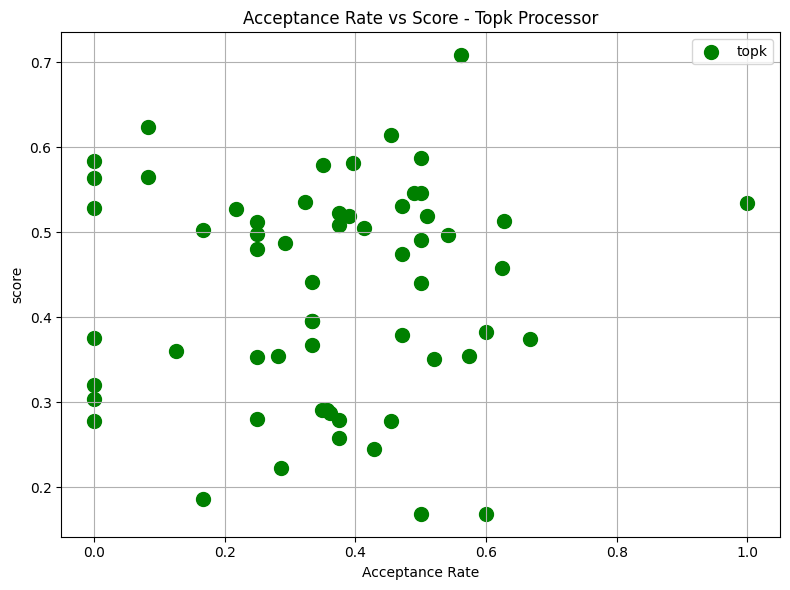

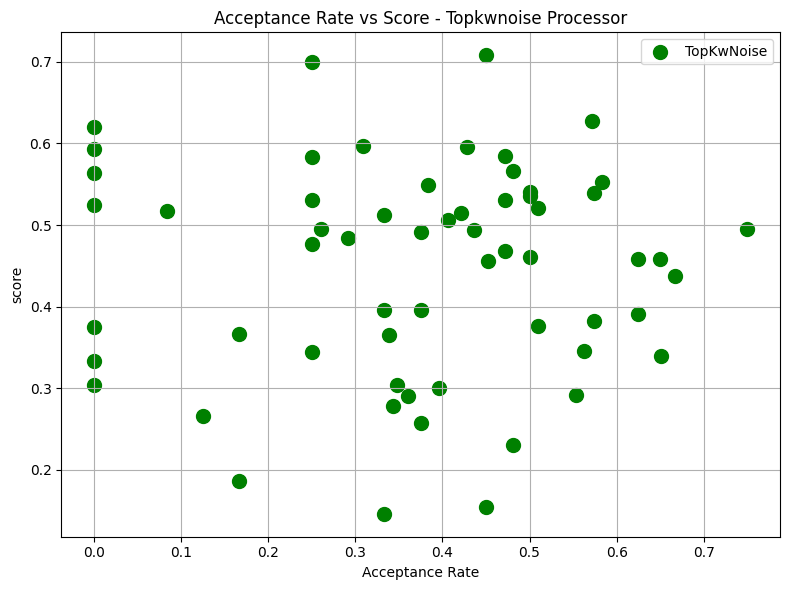

In [24]:
# Create a scatter plot for tokens_per_sec vs acceptance_rate, grouped by processor

# Get unique processors
processors = df["processor"].unique()

# Create a separate graph for each processor
for processor in processors:
    processor_data = df[df["processor"] == processor]  # Filter data for the processor

    # Plot the data
    plt.figure(figsize=(8, 6))
    plt.scatter(processor_data["acceptance_rate"], processor_data["score"], label=processor, color="green", s=100)
    plt.title(f"Acceptance Rate vs Score - {processor.capitalize()} Processor")
    plt.xlabel("Acceptance Rate")
    plt.ylabel("score")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()

    # Show each graph one by one
    plt.show()


Error Pattern Analysis:
             model    processor  average_score
0   autoregressive   TopKwNoise       0.442947
1   autoregressive       greedy       0.435545
2   autoregressive  multinomial       0.437312
3   autoregressive         topk       0.415104
4            ngram   TopKwNoise       0.398805
5            ngram       greedy       0.435381
6            ngram  multinomial       0.431208
7            ngram         topk       0.397727
8      speculative   TopKwNoise       0.411950
9      speculative       greedy       0.451690
10     speculative  multinomial       0.434391
11     speculative         topk       0.428650


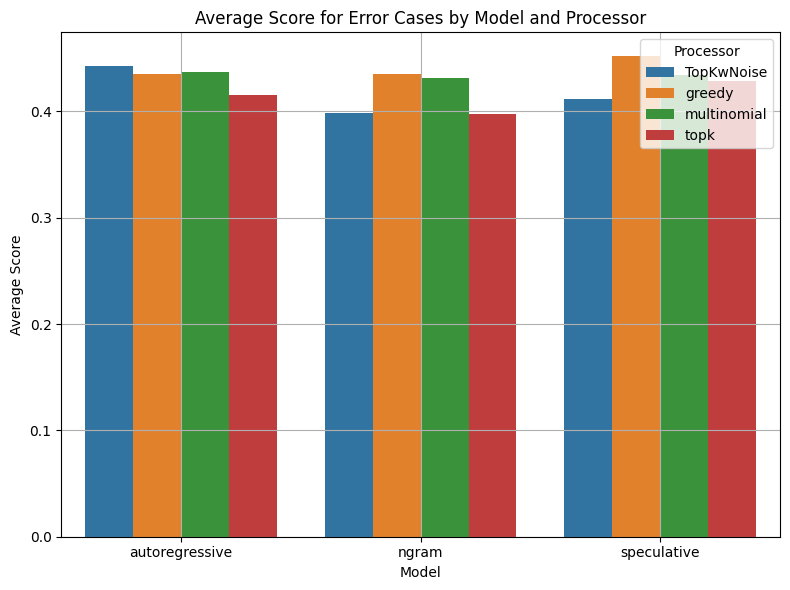

In [25]:
# Filter rows where `is_answer_in_output` is False
error_cases = df[df["is_answer_in_output"] == False]

# Analyze the error patterns
error_analysis = error_cases.groupby(["model", "processor"])["score"].mean().reset_index()
error_analysis.rename(columns={"score": "average_score"}, inplace=True)

# Print the analysis
print("Error Pattern Analysis:")
print(error_analysis)

# Visualize the results (optional)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(data=error_analysis, x="model", y="average_score", hue="processor")
plt.title("Average Score for Error Cases by Model and Processor")
plt.xlabel("Model")
plt.ylabel("Average Score")
plt.legend(title="Processor")
plt.grid(True)
plt.tight_layout()
plt.show()


In [29]:
# find the optimal model / processor

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# One-hot encode categorical columns (processor and model)
df_encoded = pd.get_dummies(df, columns=["processor", "model"], drop_first=True)

# Scale the numerical features
scaler = StandardScaler()
df.fillna(0, inplace=True)  # Replace with 0 (constant value)
df["score"] = pd.to_numeric(df["score"], errors="coerce")
df["acceptance_rate"] = pd.to_numeric(df["acceptance_rate"], errors="coerce")
df["tokens_per_sec"] = pd.to_numeric(df["tokens_per_sec"], errors="coerce")

scaled_features = scaler.fit_transform(df_encoded[[ "score", "acceptance_rate", "tokens_per_sec"] + list(df_encoded.columns[4:])])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
df["Cluster"] = kmeans.fit_predict(scaled_features)

# Analyze cluster composition
optimal_settings = df.groupby("Cluster").mean()

print("Cluster Analysis - Optimal Settings:")
print(optimal_settings)

# Visualize the clusters (e.g., acceptance_rate vs score for each cluster)
plt.figure(figsize=(8, 6))
for cluster in df["Cluster"].unique():
    cluster_data = df[df["Cluster"] == cluster]
    plt.scatter(cluster_data["acceptance_rate"], cluster_data["score"], label=f"Cluster {cluster}", s=100)

plt.title("Clusters of Optimal Processor and Model Settings")
plt.xlabel("Acceptance Rate")
plt.ylabel("Score")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()


TypeError: agg function failed [how->mean,dtype->object]